In [2]:
# Import Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pickle


In [3]:
print(sklearn.__version__)

1.2.2


In [4]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset.csv')
# Display the first few rows of the dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [5]:
#how many data-points and features?
df.shape

(2016, 9)

In [6]:
#What are the column names in our dataset?
df.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2016 non-null   object 
 1   AUSPRAEGUNG                     2016 non-null   object 
 2   JAHR                            2016 non-null   int64  
 3   MONAT                           2016 non-null   int64  
 4   WERT                            1848 non-null   float64
 5   VORJAHRESWERT                   1848 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1763 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 141.9+ KB


In [8]:
# Drop unnecessary columns
df = df[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN


In [9]:
# Rename the columns we will be working on 
df = df.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})
df.head()

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN


In [10]:
# Keep records until 2020
df = df[df['Year'] <= 2020]
df.head()

,Category,Accident_Type,Year,Month,Value
36,Alkoholunfälle,insgesamt,2020,202001,28.0
37,Alkoholunfälle,insgesamt,2020,202002,40.0
38,Alkoholunfälle,insgesamt,2020,202003,27.0
39,Alkoholunfälle,insgesamt,2020,202004,26.0
40,Alkoholunfälle,insgesamt,2020,202005,40.0


In [11]:
# Remove Year from the month from the combined column
df['Month'] = pd.to_datetime(df['Month'], format='%Y%m').dt.month
df.head()

,Category,Accident_Type,Year,Month,Value
36,Alkoholunfälle,insgesamt,2020,1,28.0
37,Alkoholunfälle,insgesamt,2020,2,40.0
38,Alkoholunfälle,insgesamt,2020,3,27.0
39,Alkoholunfälle,insgesamt,2020,4,26.0
40,Alkoholunfälle,insgesamt,2020,5,40.0


In [12]:
df.shape


(1764, 5)

# Visualizing the data
 

In [13]:
# lets see how many type of category are their

df['Category'].unique()




array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

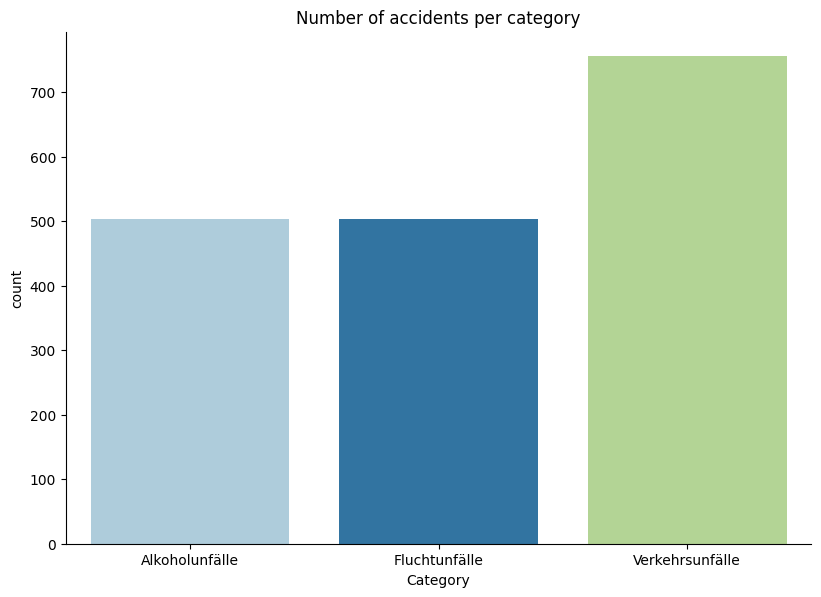

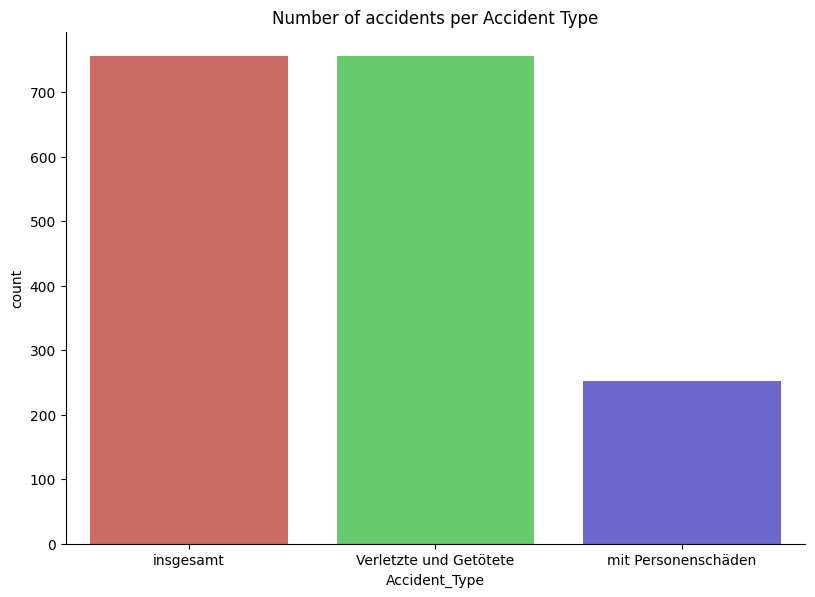

In [14]:
plot = sns.catplot(x="Category", kind="count", data=df, palette="Paired")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=df, palette="hls")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)
     

<function matplotlib.pyplot.show(close=None, block=None)>

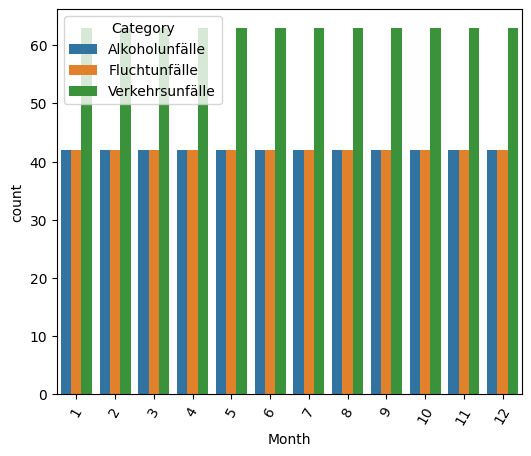

In [15]:
# plot the bar plot of Category and Month
plt.figure(figsize=(6,5))
sns.countplot(x='Month', hue='Category', data=df)
plt.xlabel('Month')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

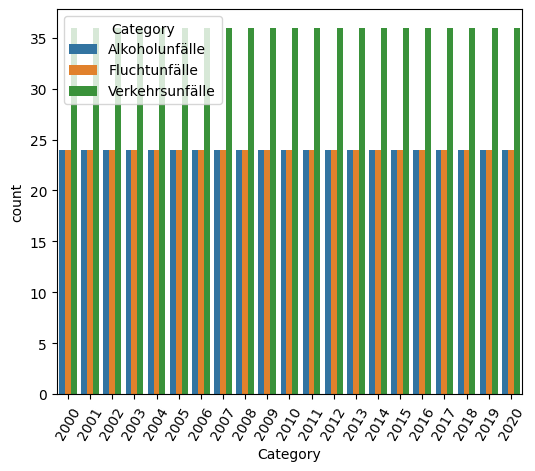

In [16]:

# plot the bar plot of Category and year
plt.figure(figsize=(6,5))
sns.countplot(x='Year', hue='Category', data=df)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

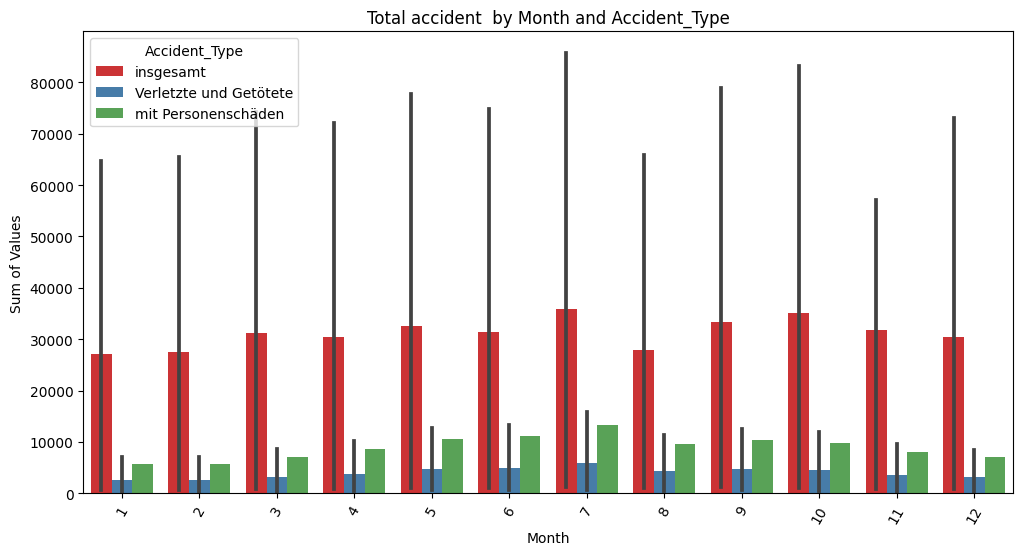

In [17]:
plt.figure(figsize=(12, 6))

# Group by 'Month', 'Category', and 'Type', summing the values
grouped_df = df.groupby(['Month', 'Category', 'Accident_Type'], as_index=False)['Value'].sum()

# Plot the bar plot
sns.barplot(x='Month', y='Value', hue='Accident_Type', data=grouped_df, palette='Set1', hue_order=['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'])
plt.xlabel('Month')
plt.ylabel('Sum of Values')
plt.title('Total accident  by Month and Accident_Type')
plt.xticks(rotation=60)
plt.savefig('Totalaccidentpertypepermonth.png')
plt.show()

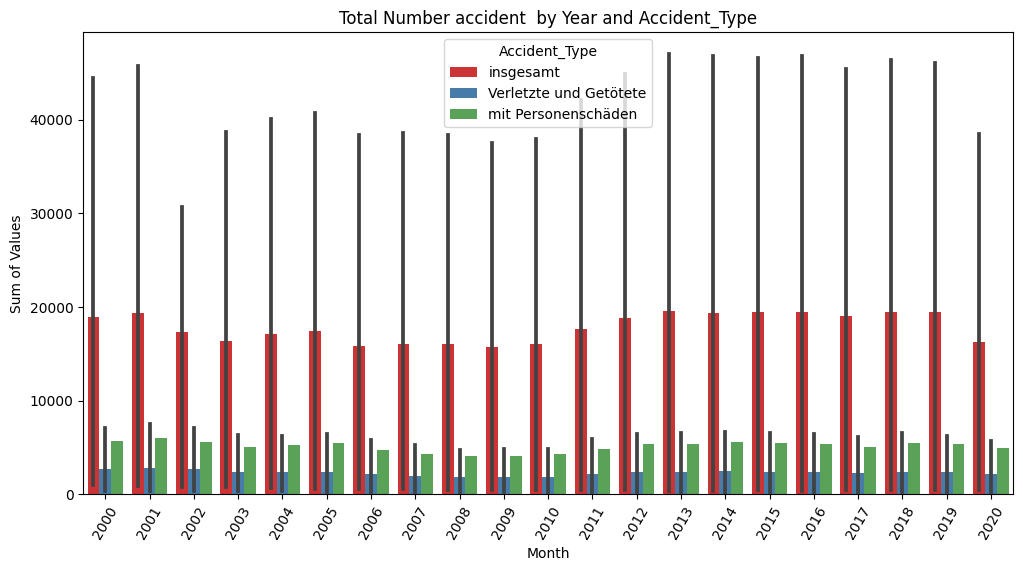

In [18]:
plt.figure(figsize=(12, 6))

# Group by 'Year', 'Category', and 'Accident Type', summing the values
grouped_df = df.groupby(['Year', 'Category', 'Accident_Type'], as_index=False)['Value'].sum()

# Plot the bar plot
sns.barplot(x='Year', y='Value', hue='Accident_Type', data=grouped_df, palette='Set1', hue_order=['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'])
plt.xlabel('Month')
plt.ylabel('Sum of Values')
plt.title('Total Number accident  by Year and Accident_Type')
plt.xticks(rotation=60)
plt.savefig('Totalaccidentpertypeperyear.png')
plt.show()

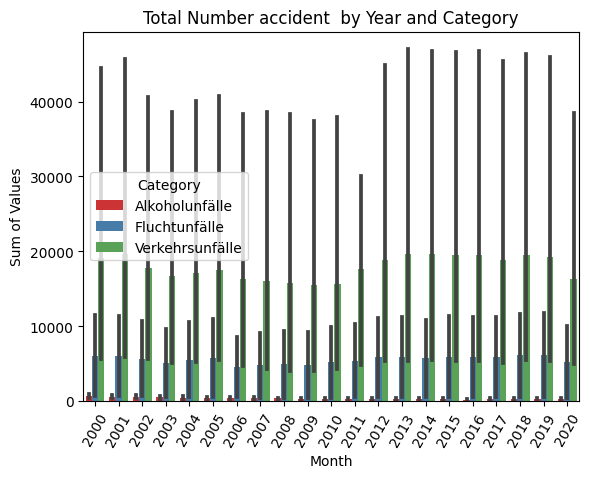

In [19]:
grouped_df = df.groupby(['Year', 'Category', 'Accident_Type'], as_index=False)['Value'].sum()

# Plot the bar plot
sns.barplot(x='Year', y='Value', hue='Category', data=grouped_df, palette='Set1')
plt.xlabel('Month')
plt.ylabel('Sum of Values')
plt.title('Total Number accident  by Year and Category')
plt.xticks(rotation=60)
plt.savefig('TotalaccidentperCategoryperyear.png')

plt.show()

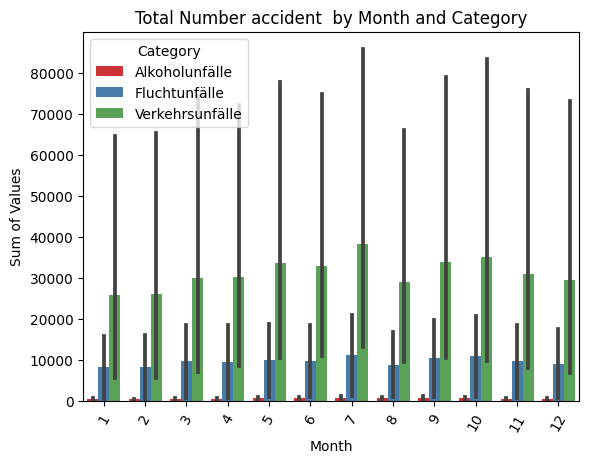

In [20]:
grouped_df = df.groupby(['Month', 'Category', 'Accident_Type'], as_index=False)['Value'].sum()

# Plot the bar plot
sns.barplot(x='Month', y='Value', hue='Category', data=grouped_df, palette='Set1')
plt.xlabel('Month')
plt.ylabel('Sum of Values')
plt.title('Total Number accident  by Month and Category')
plt.xticks(rotation=60)
plt.savefig('TotalaccidentCategoryperMonth.png')

plt.show()

from the above graphs i can observe 2 thing

1) no of accidents for the  different category, Verkehrsunfälle have high accident rate
1) no of accidents for the  different type, mit Personenschaden have high accident rate

# Lets create the prediction model on the baisis of year and month

In [140]:
# add lib needed for the ML model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



In [133]:
X = df[['Year', 'Month']]
Y = df['Value']

In [134]:
X

,Year,Month
36,2020,1
37,2020,2
38,2020,3
39,2020,4
40,2020,5
...,...,...
2011,2000,8
2012,2000,9
2013,2000,10
2014,2000,11


In [135]:
Y

36       28.0
37       40.0
38       27.0
39       26.0
40       40.0
        ...  
2011    647.0
2012    675.0
2013    615.0
2014    578.0
2015    515.0
Name: Value, Length: 1764, dtype: float64

In [136]:
# split the data set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [137]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
error = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {error}')

Mean Absolute Error: 959.699209738104


In [139]:
regressor = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


# Evaluate the model
error = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {error}')

Mean Absolute Error: 964.9977605018757


In [138]:
prediction_input = pd.DataFrame({'Year': [2021], 'Month': [1]})

# Make the prediction
prediction = model.predict(prediction_input)
print(f'Predicted Number of Accidents for Alkoholunfälle (insgesamt) in 2021-01: {prediction[0]}')

Predicted Number of Accidents for Alkoholunfälle (insgesamt) in 2021-01: 801.8616576479075


As we can see that above way are not good to predict values as its give high error may be we have to work with other features as well, we get to know from the visualization that Accident type and category both are depend each other

In [146]:
features = ['Category','Accident_Type','Year','Month']

# setting input features X and target y 
X = df[features]  # here features are selected from 'object' datatype
y = df['Value']



In [147]:
#category column encoding
cat_mapping = {'Verkehrsunfälle': 0,
                'Alkoholunfälle':1 ,
                'Fluchtunfälle': 2}
X['Category'] = X['Category'].map(cat_mapping)

#Accident_type column mapping





C:\Users\manis\AppData\Local\Temp\ipykernel_13936\3315398143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Category'] = X['Category'].map(cat_mapping)


In [148]:
accid_mapping = {'insgesamt': 0,
                'Verletzte und Getötete':1 ,
                'mit Personenschäden': 2}
X['Accident_Type'] = X['Accident_Type'].map(accid_mapping)
le = LabelEncoder()
X['Year'] = le.fit_transform(X['Year'])
X['Month'] = le.fit_transform(X['Month'])


# train and test split and building baseline model to predict target features


C:\Users\manis\AppData\Local\Temp\ipykernel_13936\2333718225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Accident_Type'] = X['Accident_Type'].map(accid_mapping)
C:\Users\manis\AppData\Local\Temp\ipykernel_13936\2333718225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = le.fit_transform(X['Year'])
C:\Users\manis\AppData\Local\Temp\ipykernel_13936\2333718225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor model


In [150]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
error = mean_absolute_error(y_test, rf_y_pred)

print(f'Mean Absolute Error: {error}')

Mean Absolute Error: 55.526827195467426


As we can see that this approch is giving very less prediction error  which can be tolerated

In [151]:
import pathlib
filename = 'model.pkl'
with open(filename, 'wb') as f:
  pickle.dump(rf_model, f)
pickle.dump(rf_model, open(filename, 'wb'))

In [162]:
model.predict([[0,1,2019,1]])

c:\Users\manis\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([354.49])